In [1]:
#Loading the necessary Librararies
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import  fetch_20newsgroups
data=fetch_20newsgroups()
data.target_names

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [0]:
#Defining all the categories
categories=['alt.atheism','comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Text(89.17999999999999, 0.5, 'predicted lable')

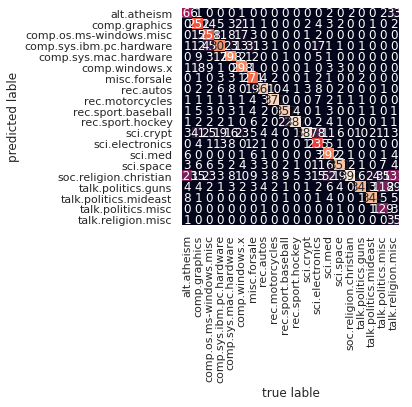

In [3]:
#training the data on these categories
train=fetch_20newsgroups(subset='train',categories=data.target_names)

#Testing the data for these categories
test=fetch_20newsgroups(subset='test',categories=data.target_names)

#printing trainging data
#print(test.data[5])


#importing necessary packeges
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

#Creating a model based on Multinomal Navie Bayes
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
#Training the model with the train data
model.fit(train.data,train.target)

#Creating lables for the test Data
lables=model.predict(test.data)


# Creating confusion matrix and heat map
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target,lables)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=train.target_names,yticklabels=train.target_names)

#Plotting Heatmap of Confusion Matrix
plt.xlabel('true lable')
plt.ylabel('predicted lable')

In [0]:
def predict_category(s,train=train,model=model):
  pred=model.predict([s])
  return train.target_names[pred[0]]

In [5]:
predict_category("Photoshop is designing tool")

'comp.graphics'

In [6]:
predict_category("CPU Gen 5")

'comp.sys.ibm.pc.hardware'

In [7]:
predict_category("BMW is better than HarlyDevid")

'rec.motorcycles'

In [8]:
predict_category("President of India")

'talk.politics.misc'